In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib        as mpl
import plotly.express    as px
import matplotlib.pyplot as plt
import missingno         as msno
import shap              

%matplotlib inline
plt.style.use('seaborn')

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.figsize"] = (30,15)

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [8]:
from sklearn          import tree
from xgboost          import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets        import load_iris
from sklearn.metrics         import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix

# 1. Data Cleaning

# 2. Train Test Split

# 3. Model

# 4. Classification Report 

# 5. Feature Importance

In [11]:
import pandas as pd

# create a sample DataFrame with very large and very small numbers
data = {'col1': [1e10, 2e-10]}
df = pd.DataFrame(data)

# modify the display options to show the full precision of the numbers
pd.options.display.float_format = '{:.2f}'.format

# print the DataFrame with the modified display options
print(df)

# reset the float format to its default value
pd.reset_option('display.float_format')

# print the DataFrame with the default display options
print(df)

            col1
0 10000000000.00
1           0.00
           col1
0  1.000000e+10
1  2.000000e-10


In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 61,   2],
       [  1, 107]], dtype=int64)

In [5]:
data = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, stratify=y)

In [7]:
# Train an XGBoost classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate a classification report
target_names = data.target_names
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        63
      benign       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [9]:
# load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the XGBoost model and its hyperparameters
model = XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, learning_rate=0.1, n_estimators=100)

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

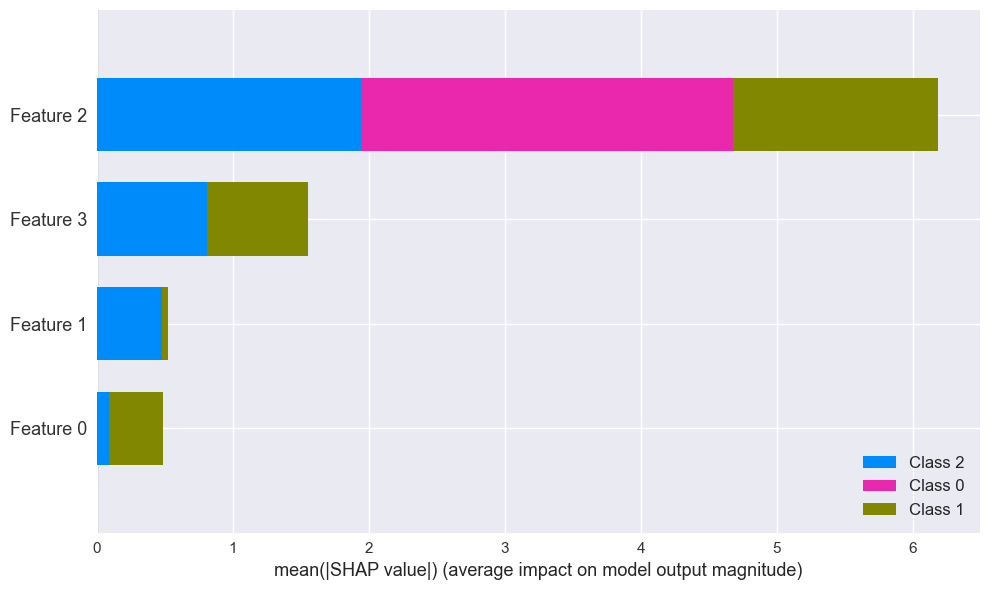

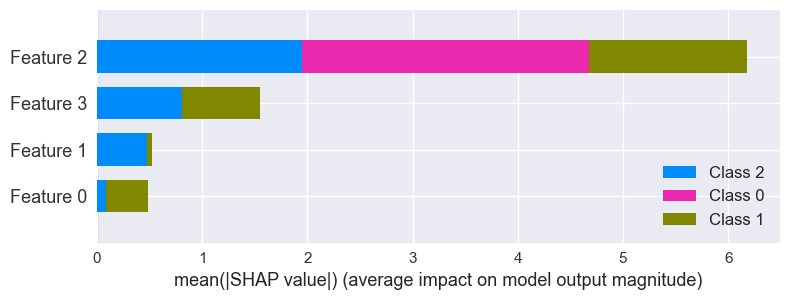

In [15]:
# load your data and train an XGBoost model

# compute SHAP values for all features
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# plot the SHAP values for each feature
shap.summary_plot(shap_values, X, plot_type='bar', plot_size=(10, 6))

# plot the SHAP values for each instance
shap.summary_plot(shap_values, X)

In [21]:
shap.plots.beeswarm(shap_values)

ValueError: the beeswarm plot requires Explanation object as the `shap_values` argument

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


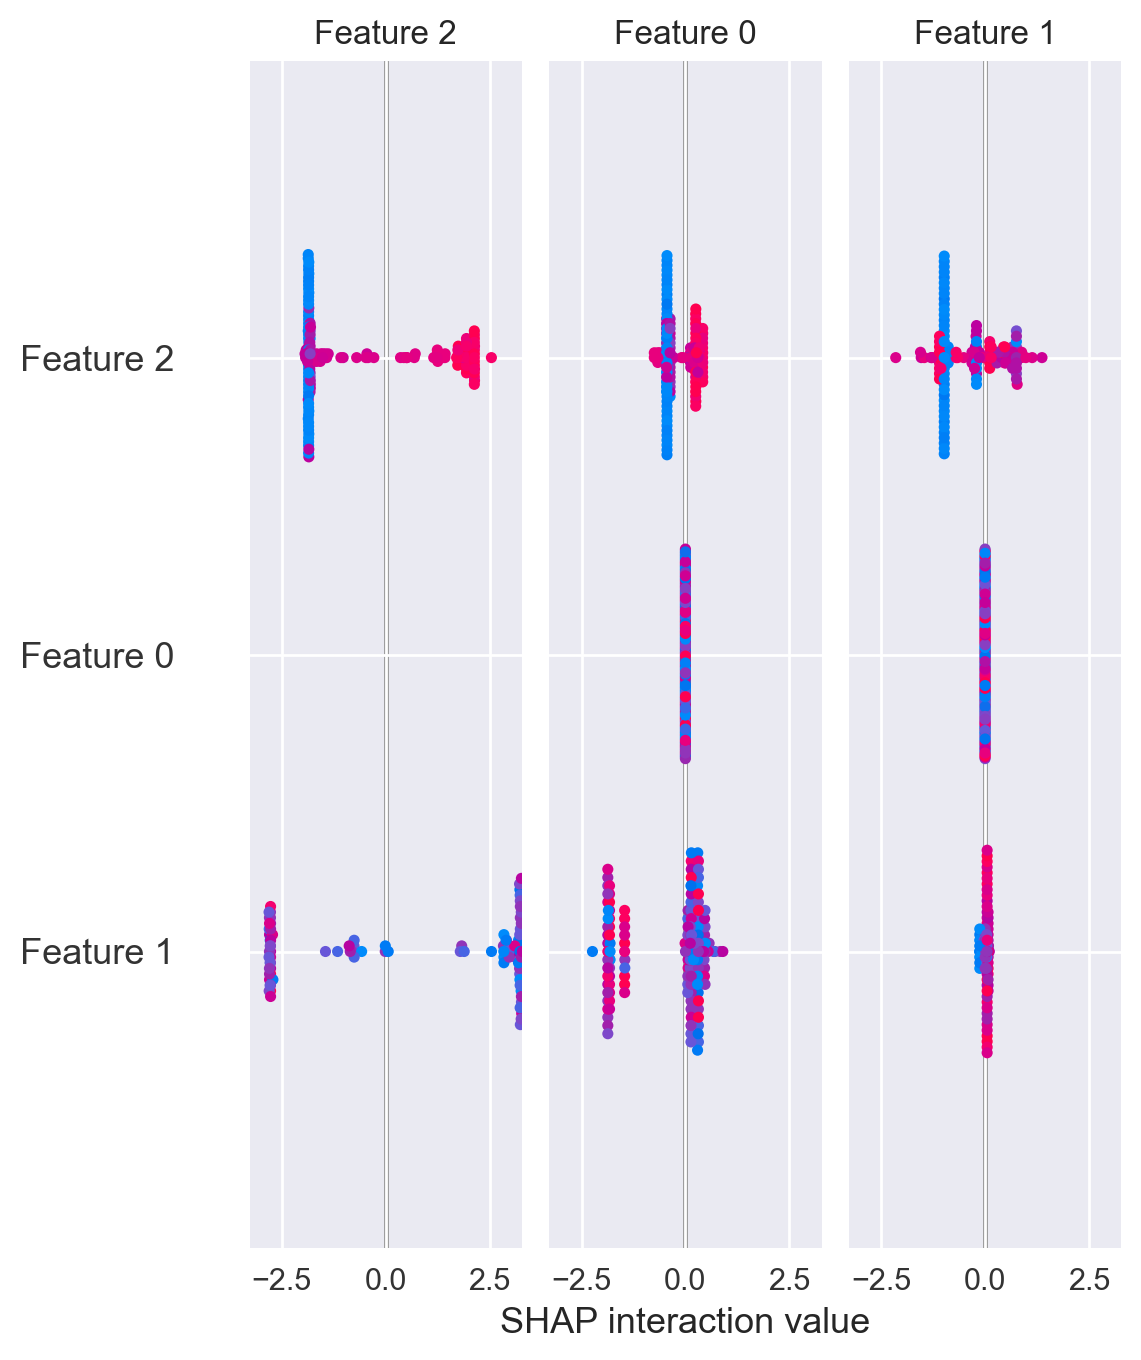

In [25]:
import xgboost as xgb
import shap
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train an XGBoost model on the Iris dataset
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, learning_rate=0.1, n_estimators=100)
model.fit(X, y)

# Use SHAP to explain the model's predictions on the Iris dataset
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualize the explanations using shap.summary_plot
shap.summary_plot(shap_values, X, plot_type='bar')

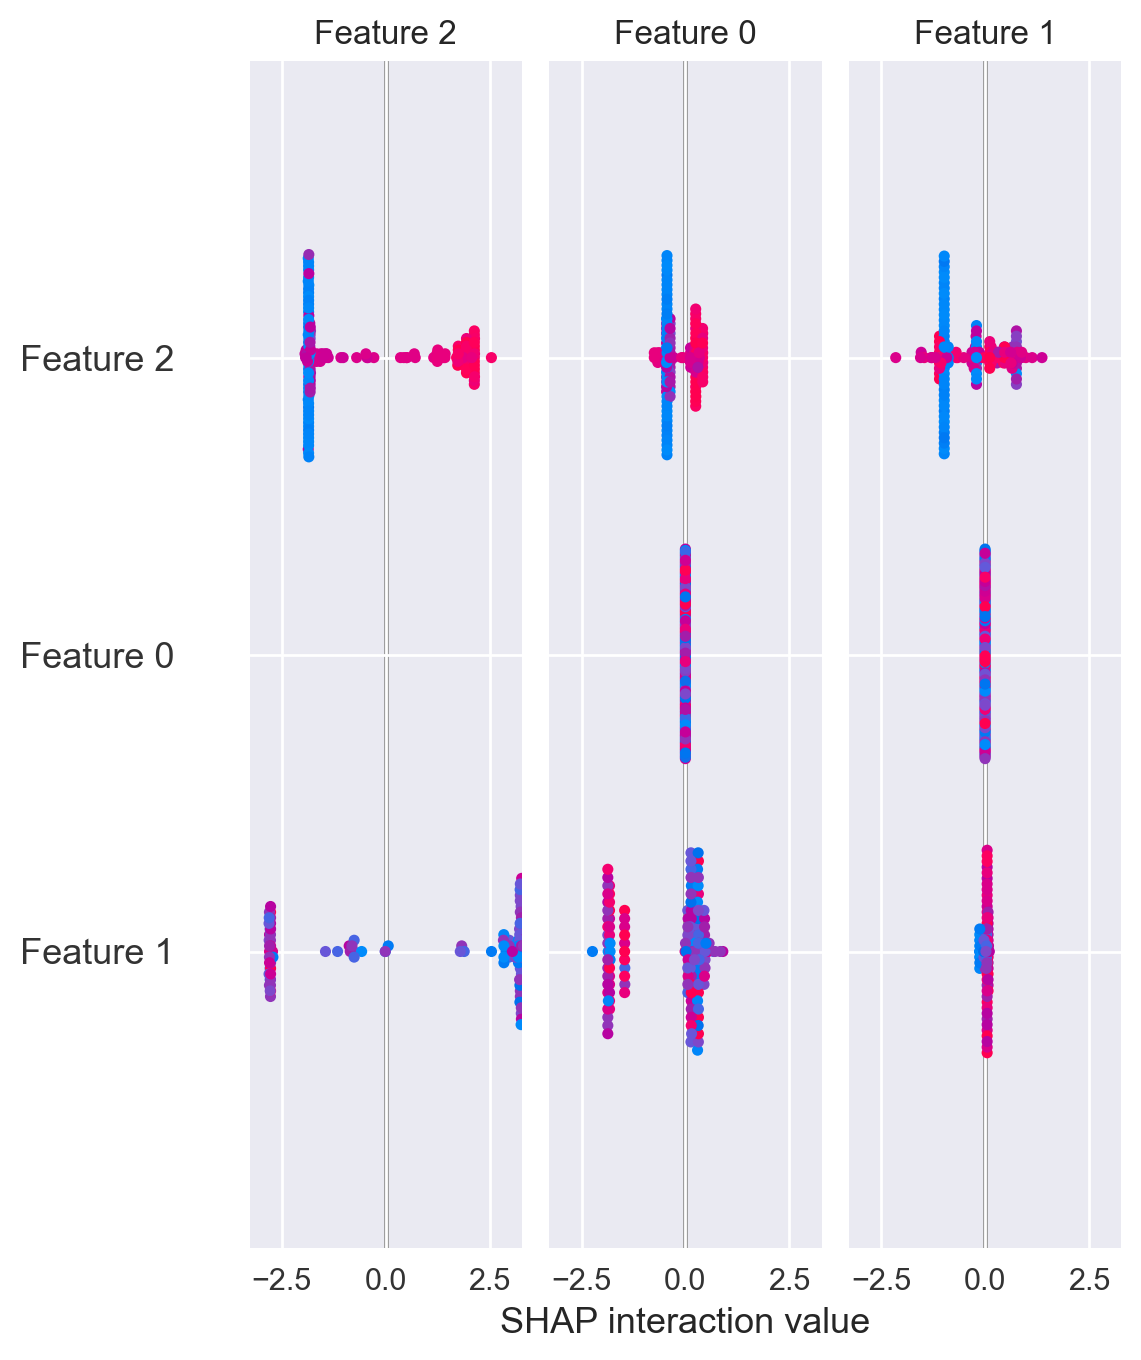

In [26]:
shap.summary_plot(shap_values, X)

In [28]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [29]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.54663
[100]	test-logloss:0.36373
[200]	test-logloss:0.31793
[300]	test-logloss:0.30061
[400]	test-logloss:0.29207
[500]	test-logloss:0.28678
[600]	test-logloss:0.28381
[700]	test-logloss:0.28181
[800]	test-logloss:0.28064
[900]	test-logloss:0.27992
[1000]	test-logloss:0.27928
[1019]	test-logloss:0.27935


In [30]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [31]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [32]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


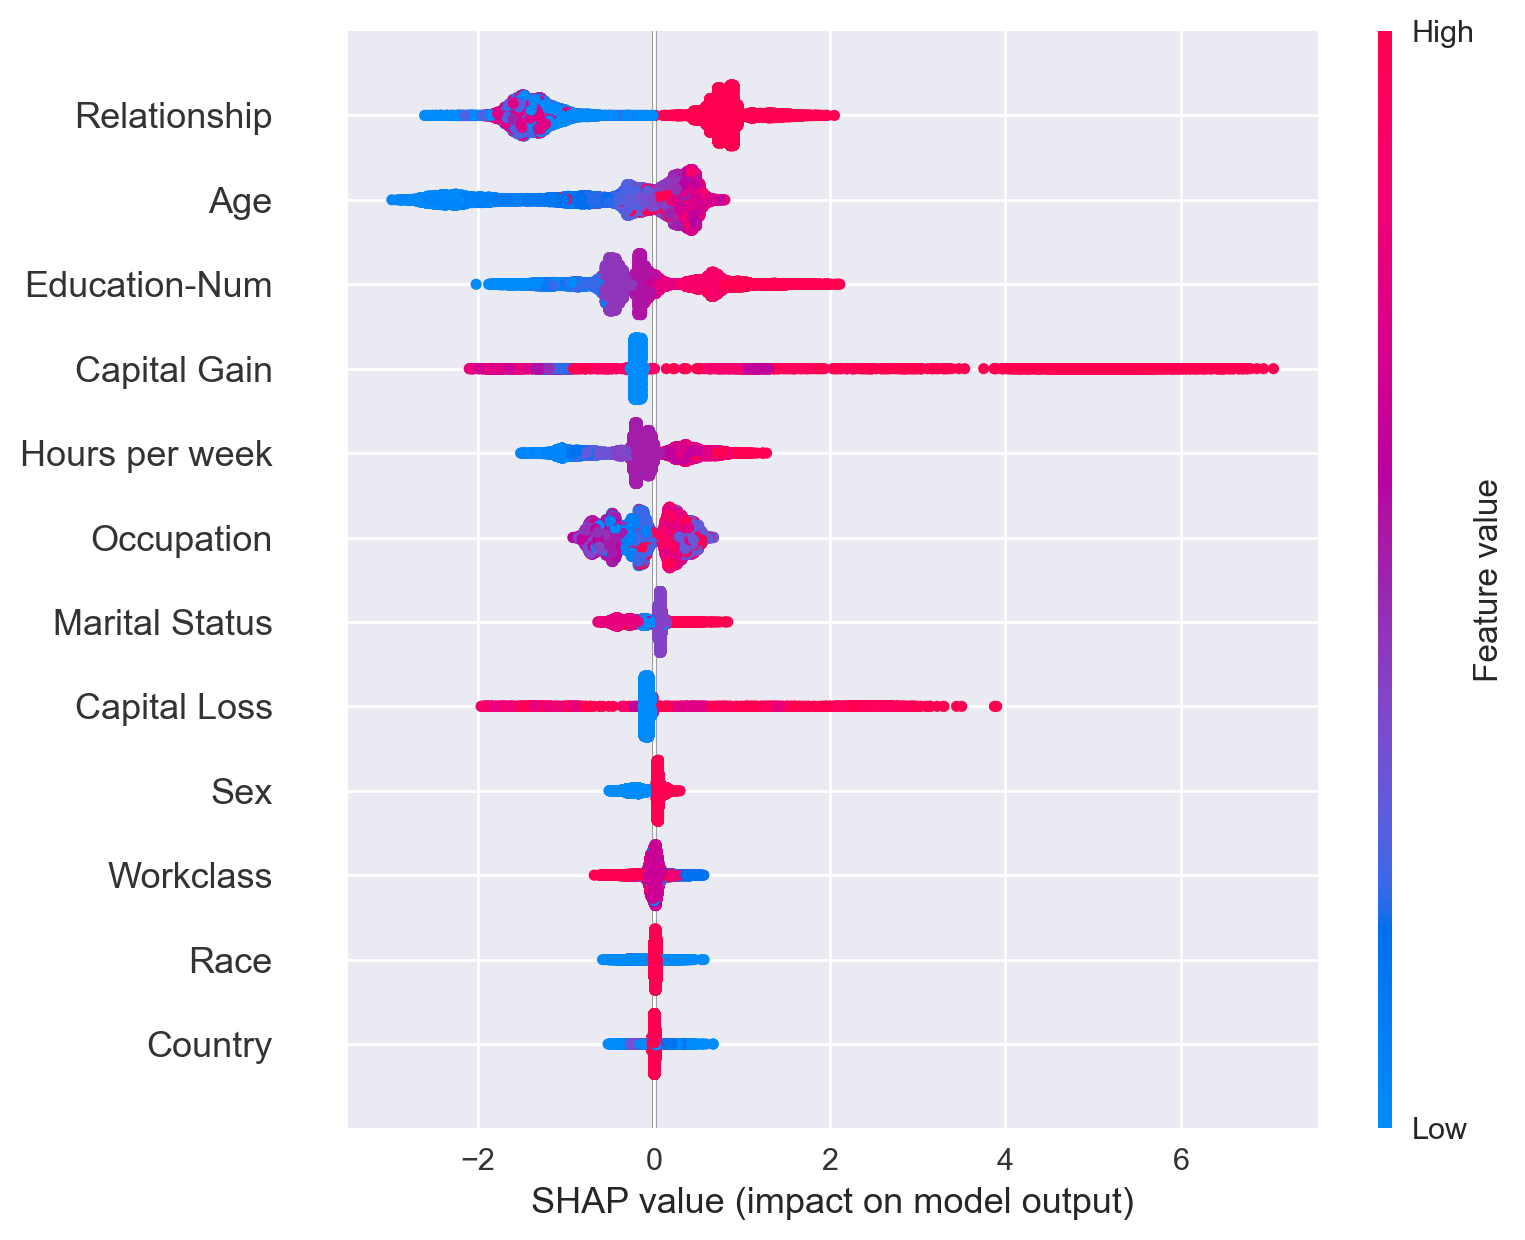

In [33]:
shap.summary_plot(shap_values, X)

In [ ]:
import shap
import numpy as np
import multiprocessing

# Load a sample dataset and model
X, y = shap.datasets.diabetes()
model = shap.models.LinearModel(shap.sample(X, 100))

# Use a smaller subset of the data
X_sample = shap.sample(X, 50)

# Use a faster implementation
explainer = shap.Explainer(model, X_sample, algorithm='tree')

# Use parallel processing
num_cores = multiprocessing.cpu_count()
shap_values = explainer(X_sample, max_evals=1000, num_samples=500, output_rank_order='max',  n_jobs=num_cores)

# Select only the most important features
feature_importance = np.abs(shap_values.values).mean(axis=0)
selected_features = feature_importance.argsort()[-10:]

# Compute SHAP values only for selected features
shap_values = explainer(X_sample[:, selected_features], max_evals=1000, num_samples=500, output_rank_order='max',  n_jobs=num_cores)

# Use an approximate method
kernel_explainer = shap.KernelExplainer(model, X_sample[:100])
kernel_shap_values = kernel_explainer.shap_values(X_sample[:10])
